# Import all basic libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import confusion_matrix,classification_report
from xgboost import XGBClassifier
import pickle
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.multiclass import OneVsOneClassifier
from sklearn import model_selection
seed = 42

# Loading the Data

In [2]:
df = pd.read_csv(r'C:\Users\USER\Desktop\AI\ML Shai\last project\train (1).csv')

# EDA (Exploratory Data Analysis)
For making a proper undertanding of dataset we are using, we will perform a bief EDA (Exploratory Data Analysis). The EDA is sub-divided into:

    Data Visuals
    Data Understanding
    Data Analysis

In [3]:
df.head()

,Id,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,1,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,2,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,3,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,4,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,5,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [4]:
df.shape

(14396, 18)

## features

* artist: Name of the Artist.
* song: Name of the Track.
* popularity: The higher the value the more popular the song is.
* danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm
* energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on..
* loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative
* mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
* speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

* acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

* instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

* liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

* valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

* tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

* duration in milliseconds :Time of the song

* time_signature : a notational convention used in Western musical notation to specify how many beats (pulses) are contained in each measure (bar), and which note value is equivalent to a beat.

* Class: Genre of the track.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

## check if any null values in data and any duplicated data

In [6]:
df.duplicated().any()

False

In [7]:
print(df.isnull().sum())

Id                       0
Artist Name              0
Track Name               0
Popularity             333
danceability             0
energy                   0
key                   1609
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      3541
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64


In [8]:
info_df = pd.DataFrame(df.dtypes)

# identifying the missing values from the dataset.
info_df['missing_val'] = df.isnull().sum()

info_df['missing_val_ratio'] = (info_df['missing_val'] / df.shape[0] * 100).round().astype(int)


# renaming the first column using rename()
info_df = info_df.rename(columns = {0:'data_type'})
info_df

,data_type,missing_val,missing_val_ratio
Id,int64,0,0
Artist Name,object,0,0
Track Name,object,0,0
Popularity,float64,333,2
danceability,float64,0,0
energy,float64,0,0
key,float64,1609,11
loudness,float64,0,0
mode,int64,0,0
speechiness,float64,0,0


In [9]:
df.describe()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,14396.000000,14063.000000,14396.000000,14396.000000,12787.000000,14396.000000,14396.000000,14396.000000,14396.000000,10855.000000,14396.000000,14396.000000,14396.000000,1.439600e+04,14396.000000,14396.000000
mean,7198.500000,44.525208,0.543105,0.662422,5.953781,-7.900852,0.640247,0.080181,0.246746,0.178129,0.195782,0.486379,122.695372,2.000942e+05,3.924354,6.695679
std,4155.911573,17.418940,0.165517,0.235967,3.200013,4.057362,0.479944,0.085157,0.310922,0.304266,0.159258,0.239476,29.538490,1.116891e+05,0.359520,3.206170
min,1.000000,1.000000,0.059600,0.001210,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.021500,30.557000,5.016500e-01,1.000000,0.000000
25%,3599.750000,33.000000,0.432000,0.508000,3.000000,-9.538000,0.000000,0.034800,0.004280,0.000088,0.097275,0.299000,99.799000,1.654458e+05,4.000000,5.000000
50%,7198.500000,44.000000,0.545000,0.699000,6.000000,-7.013500,1.000000,0.047100,0.081450,0.003920,0.129000,0.480500,120.060000,2.089410e+05,4.000000,8.000000
75%,10797.250000,56.000000,0.658000,0.861000,9.000000,-5.162000,1.000000,0.083100,0.432250,0.201000,0.256000,0.672000,141.988250,2.522470e+05,4.000000,10.000000
max,14396.000000,100.000000,0.989000,1.000000,11.000000,1.342000,1.000000,0.955000,0.996000,0.996000,0.992000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [10]:
df.describe(include=['O'])

,Artist Name,Track Name
count,14396,14396
unique,7913,12455
top,Backstreet Boys,Fire
freq,58,8


In [11]:
df.var()

C:\Users\USER\AppData\Local\Temp\ipykernel_14828\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Id                    1.727160e+07
Popularity            3.034195e+02
danceability          2.739588e-02
energy                5.568065e-02
key                   1.024008e+01
loudness              1.646219e+01
mode                  2.303467e-01
speechiness           7.251645e-03
acousticness          9.667246e-02
instrumentalness      9.257760e-02
liveness              2.536303e-02
valence               5.734884e-02
tempo                 8.725224e+02
duration_in min/ms    1.247445e+10
time_signature        1.292547e-01
Class                 1.027953e+01
dtype: float64

In [12]:
df.cov()

,Id,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Id,1.727160e+07,653.435589,7.529887,-9.879614,76.077183,-126.704060,-20.795172,-1.831394,-8.823153,6.051463,-5.389850,-2.034170,-520.433799,7.408836e+06,-1.368496,36.015804
Popularity,6.534356e+02,303.419486,0.499692,0.212303,0.567471,8.754268,0.115032,0.043449,-0.695823,-0.836400,-0.189741,0.228211,-1.524755,-5.361306e+04,0.440062,8.857358
danceability,7.529887e+00,0.499692,0.027396,-0.003703,0.004061,0.037737,-0.005506,0.002861,0.000382,-0.010232,-0.002793,0.017631,-0.883776,-2.352313e+03,0.008160,-0.053679
energy,-9.879614e+00,0.212303,-0.003703,0.055681,0.009652,0.736806,-0.004074,0.002429,-0.054764,-0.014021,0.007433,0.012858,1.431812,6.356550e+03,0.012129,0.163121
key,7.607718e+01,0.567471,0.004061,0.009652,10.240082,0.074043,-0.175861,0.000313,-0.007620,-0.001211,0.007426,0.024128,1.884343,5.105833e+03,0.009230,-0.042714
loudness,-1.267041e+02,8.754268,0.037737,0.736806,0.074043,16.462188,-0.059496,0.031259,-0.775795,-0.460863,0.073445,0.180511,19.385516,7.658591e+04,0.183764,2.264941
mode,-2.079517e+01,0.115032,-0.005506,-0.004074,-0.175861,-0.059496,0.230347,-0.002963,0.003106,-0.002864,-0.000206,-0.000871,0.249736,-3.797831e+03,-0.002902,-0.061693
speechiness,-1.831394e+00,0.043449,0.002861,0.002429,0.000313,0.031259,-0.002963,0.007252,-0.002247,-0.001342,0.000984,0.001208,0.125114,5.947466e+01,0.001714,-0.017142
acousticness,-8.823153e+00,-0.695823,0.000382,-0.054764,-0.007620,-0.775795,0.003106,-0.002247,0.096672,0.017845,-0.005417,-0.009509,-1.496912,-1.115964e+04,-0.015594,-0.239855
instrumentalness,6.051463e+00,-0.836400,-0.010232,-0.014021,-0.001211,-0.460863,-0.002864,-0.001342,0.017845,0.092578,-0.002409,-0.017009,-0.324463,-3.545041e+02,-0.007889,-0.028487


In [13]:
df.nunique()

Id                    14396
Artist Name            7913
Track Name            12455
Popularity              100
danceability            887
energy                 1156
key                      11
loudness               8051
mode                      2
speechiness            1177
acousticness           3725
instrumentalness       3945
liveness               1407
valence                1268
tempo                 11392
duration_in min/ms    11805
time_signature            4
Class                    11
dtype: int64

In [14]:
len(df["Id"].unique()) 

14396

In [15]:
len(df["Artist Name"].unique())

7913

In [16]:
len(df["Track Name"].unique())

12455

In [17]:
df["Artist Name"].unique()

array(['Marina Maximilian', 'The Black Keys', 'Royal & the Serpent', ...,
       'Cold Years', 'The Jaded Hearts Club', 'Freddy Fender'],
      dtype=object)

In [18]:
df["Track Name"].unique()

array(['Not Afraid', "Howlin' for You", 'phuck u', ..., 'Too Far Gone',
       "Reach Out I'll Be There", 'Before the Next Teardrop Falls'],
      dtype=object)

In [19]:
df["mode"].unique()

array([0, 1], dtype=int64)

In [20]:
df["key"].unique()

array([ 9., 11.,  7., nan,  6.,  1.,  5., 10.,  4.,  2.,  3.,  8.])

In [21]:
df["Class"].unique()

array([ 9,  6, 10,  2,  5,  0,  8,  4,  3,  1,  7], dtype=int64)

In [22]:
df['Class'].value_counts()

10    3959
6     2069
9     2019
8     1483
5     1157
1     1098
2     1018
0      500
7      461
3      322
4      310
Name: Class, dtype: int64

# Data Visualizations
After getting some useful information about our data, we now make visuals of our data to see how the trend in our data goes like. The visuals include bar plots, distribution plots, scatter plots, etc.

In [23]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = df, palette = "ocean", order = order)
    plt.title(f"Counts in each {feature}")
    plt.show()

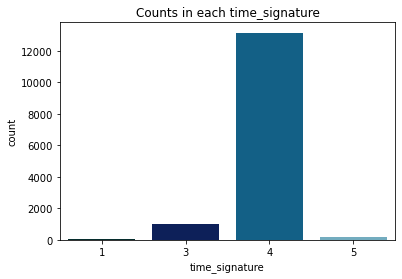

In [24]:
plot_counts("time_signature")

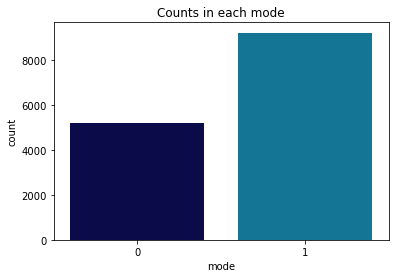

In [25]:
plot_counts("mode")

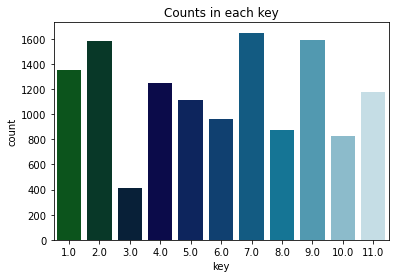

In [26]:
plot_counts("key")

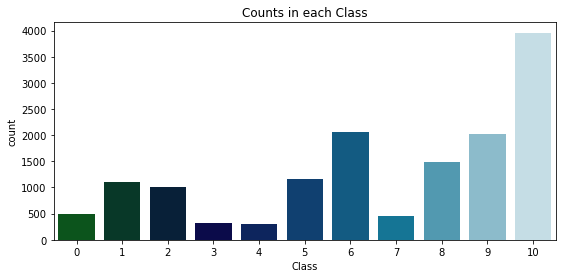

In [27]:
plt.figure(figsize = (9, 4))
plot_counts("Class")

In [28]:
df.drop(columns=['Id'], axis=1, inplace=True)

In [29]:
df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Marina Maximilian,Not Afraid,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.106,0.235,152.429,204947.0,4,9
1,The Black Keys,Howlin' for You,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.0468,0.104,0.380,132.921,191956.0,4,6
2,Royal & the Serpent,phuck u,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.6350,0.284,0.635,159.953,161037.0,4,10
3,Detroit Blues Band,Missing You,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.0213,0.300,0.501,172.472,298093.0,3,2
4,Coast Contra,My Lady,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.211,0.619,88.311,254145.0,4,5


In [30]:
numeric_features = df.drop(columns=["Artist Name","Track Name"], axis = 1)

In [31]:
numeric_features

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,37.0,0.334,0.536,9.0,-6.649,0,0.0381,0.378000,NaN,0.1060,0.235,152.429,204947.000000,4,9
1,67.0,0.725,0.747,11.0,-5.545,1,0.0876,0.027200,0.046800,0.1040,0.380,132.921,191956.000000,4,6
2,NaN,0.584,0.804,7.0,-6.094,1,0.0619,0.000968,0.635000,0.2840,0.635,159.953,161037.000000,4,10
3,12.0,0.515,0.308,NaN,-14.711,1,0.0312,0.907000,0.021300,0.3000,0.501,172.472,298093.000000,3,2
4,48.0,0.565,0.777,6.0,-5.096,0,0.2490,0.183000,NaN,0.2110,0.619,88.311,254145.000000,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14391,47.0,0.607,0.946,1.0,-2.965,1,0.1500,0.005480,0.000390,0.2780,0.653,120.011,195181.000000,4,10
14392,27.0,0.435,0.951,8.0,-7.475,1,0.0576,0.000005,0.550000,0.0952,0.203,135.034,282043.000000,4,8
14393,22.0,0.415,0.941,11.0,-4.300,1,0.0524,0.001810,0.000004,0.3370,0.572,167.978,176529.000000,4,10
14394,37.0,0.493,0.986,1.0,-2.279,1,0.0917,0.000967,0.006620,0.1230,0.567,122.036,186307.000000,4,10


# Visualization every feature

Histogram  && Density chart for numeric column

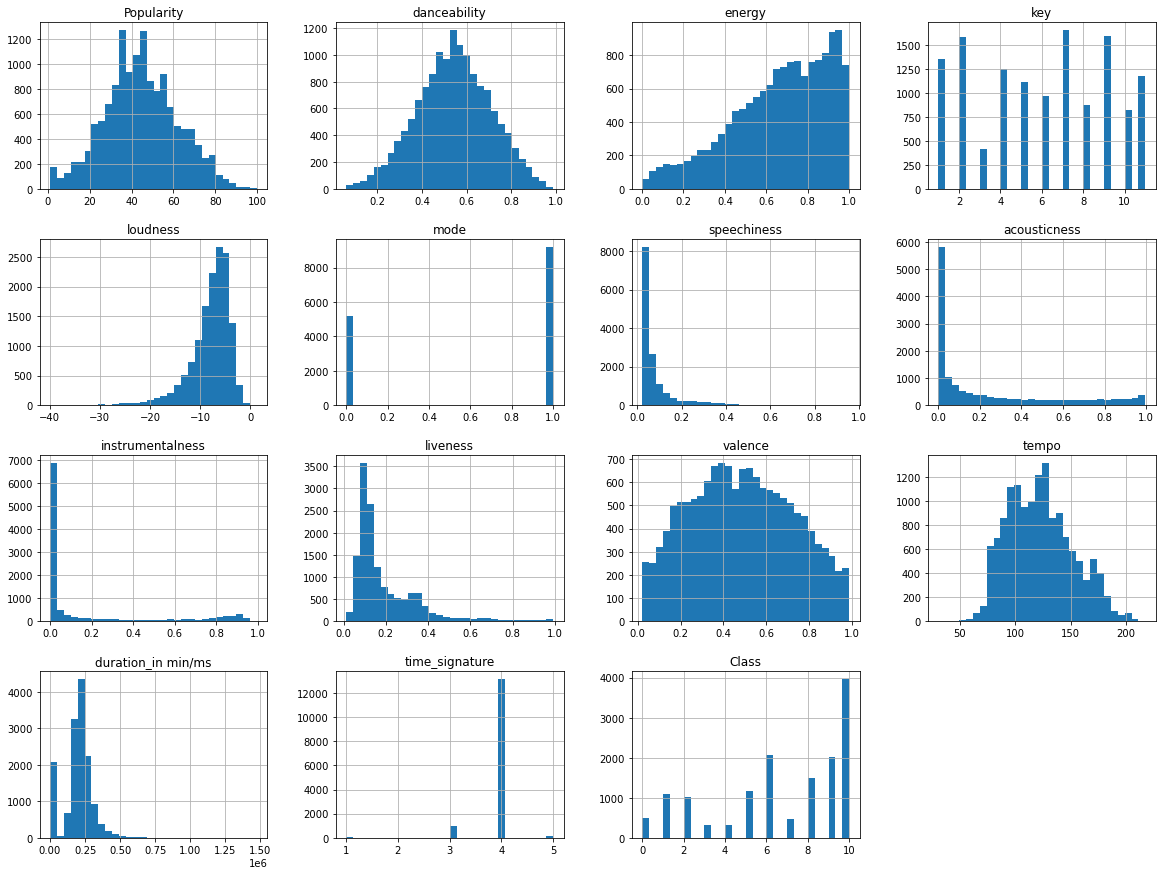

In [32]:
numeric_features.hist(bins=30, figsize=(20,15))
plt.show()

In [33]:
numeric_features.var()

Popularity            3.034195e+02
danceability          2.739588e-02
energy                5.568065e-02
key                   1.024008e+01
loudness              1.646219e+01
mode                  2.303467e-01
speechiness           7.251645e-03
acousticness          9.667246e-02
instrumentalness      9.257760e-02
liveness              2.536303e-02
valence               5.734884e-02
tempo                 8.725224e+02
duration_in min/ms    1.247445e+10
time_signature        1.292547e-01
Class                 1.027953e+01
dtype: float64

In [34]:
numeric_features.cov()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
Popularity,303.419486,0.499692,0.212303,0.567471,8.754268,0.115032,0.043449,-0.695823,-0.836400,-0.189741,0.228211,-1.524755,-5.361306e+04,0.440062,8.857358
danceability,0.499692,0.027396,-0.003703,0.004061,0.037737,-0.005506,0.002861,0.000382,-0.010232,-0.002793,0.017631,-0.883776,-2.352313e+03,0.008160,-0.053679
energy,0.212303,-0.003703,0.055681,0.009652,0.736806,-0.004074,0.002429,-0.054764,-0.014021,0.007433,0.012858,1.431812,6.356550e+03,0.012129,0.163121
key,0.567471,0.004061,0.009652,10.240082,0.074043,-0.175861,0.000313,-0.007620,-0.001211,0.007426,0.024128,1.884343,5.105833e+03,0.009230,-0.042714
loudness,8.754268,0.037737,0.736806,0.074043,16.462188,-0.059496,0.031259,-0.775795,-0.460863,0.073445,0.180511,19.385516,7.658591e+04,0.183764,2.264941
mode,0.115032,-0.005506,-0.004074,-0.175861,-0.059496,0.230347,-0.002963,0.003106,-0.002864,-0.000206,-0.000871,0.249736,-3.797831e+03,-0.002902,-0.061693
speechiness,0.043449,0.002861,0.002429,0.000313,0.031259,-0.002963,0.007252,-0.002247,-0.001342,0.000984,0.001208,0.125114,5.947466e+01,0.001714,-0.017142
acousticness,-0.695823,0.000382,-0.054764,-0.007620,-0.775795,0.003106,-0.002247,0.096672,0.017845,-0.005417,-0.009509,-1.496912,-1.115964e+04,-0.015594,-0.239855
instrumentalness,-0.836400,-0.010232,-0.014021,-0.001211,-0.460863,-0.002864,-0.001342,0.017845,0.092578,-0.002409,-0.017009,-0.324463,-3.545041e+02,-0.007889,-0.028487
liveness,-0.189741,-0.002793,0.007433,0.007426,0.073445,-0.000206,0.000984,-0.005417,-0.002409,0.025363,0.001044,0.144780,8.285252e+02,0.000849,0.020476


# correlations

In [35]:
corr_matrix=numeric_features.corr()

In [36]:
corr_matrix['Class'].abs().sort_values(ascending=False)

Class                 1.000000
acousticness          0.240609
energy                0.215611
duration_in min/ms    0.203822
loudness              0.174111
Popularity            0.159484
danceability          0.101152
valence               0.080036
speechiness           0.062784
liveness              0.040101
mode                  0.040092
time_signature        0.040053
tempo                 0.034496
instrumentalness      0.028631
key                   0.004175
Name: Class, dtype: float64

<AxesSubplot:>

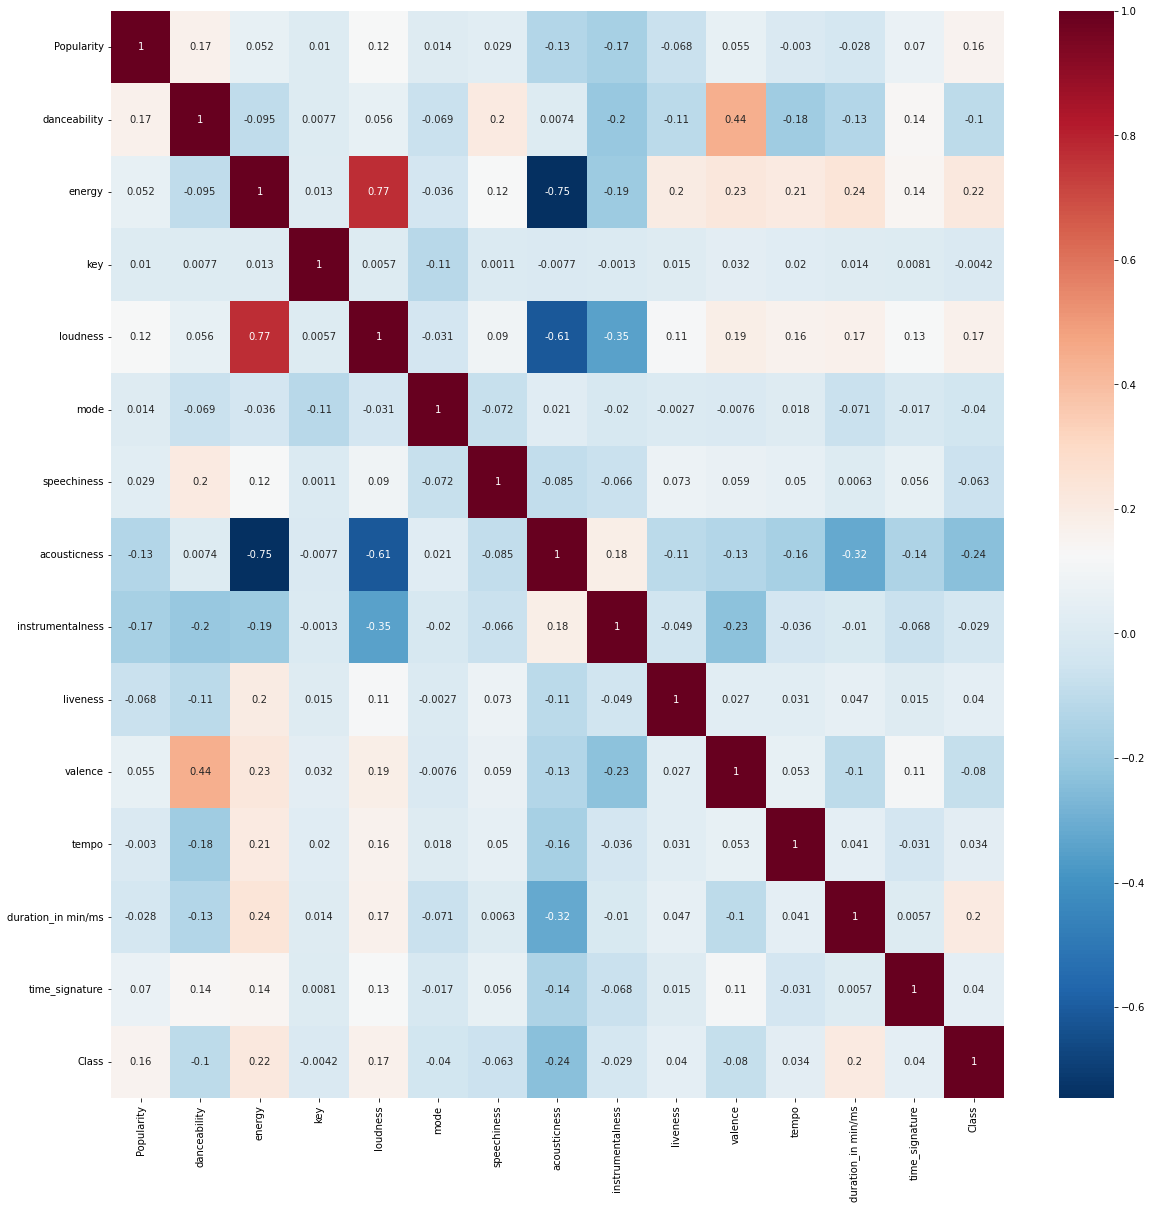

In [37]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True)

# Data Preprocessing
Data preprocessing plays an important part in the process of data science, since data may not be fully clean and can contain missing or null values. In this step, we are undergoing some preprocessing steps that will help us if there is any null or missing value in our data.

In [38]:
df['Track Name'] = LabelEncoder().fit_transform(df['Track Name'])

In [39]:
enc = OrdinalEncoder(categories=[df["Artist Name"].value_counts().sort_values(ascending = True).index],dtype=int)
df[['Artist Name']]=enc.fit_transform(df[['Artist Name']])

In [40]:
df['Artist Name']

0        7668
1        7887
2        5639
3        3271
4        5651
         ... 
14391    5487
14392    4114
14393    4382
14394    4284
14395    3956
Name: Artist Name, Length: 14396, dtype: int32

In [41]:
df['Track Name']

0         6755
1         4263
2        11474
3         6223
4         6441
         ...  
14391     4555
14392     2262
14393    10103
14394     7634
14395      953
Name: Track Name, Length: 14396, dtype: int32

In [42]:
len(df["Artist Name"].unique())

7913

In [43]:
df["Artist Name"].unique()

array([7668, 7887, 5639, ..., 4382, 4284, 3956])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         14396 non-null  int32  
 1   Track Name          14396 non-null  int32  
 2   Popularity          14063 non-null  float64
 3   danceability        14396 non-null  float64
 4   energy              14396 non-null  float64
 5   key                 12787 non-null  float64
 6   loudness            14396 non-null  float64
 7   mode                14396 non-null  int64  
 8   speechiness         14396 non-null  float64
 9   acousticness        14396 non-null  float64
 10  instrumentalness    10855 non-null  float64
 11  liveness            14396 non-null  float64
 12  valence             14396 non-null  float64
 13  tempo               14396 non-null  float64
 14  duration_in min/ms  14396 non-null  float64
 15  time_signature      14396 non-null  int64  
 16  Clas

In [45]:
music_features = df.drop("Class", axis = 1)
music_labels = df["Class"]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(music_features, music_labels, test_size = 0.2, random_state=42)

In [47]:
X_train.shape

(11516, 16)

In [48]:
X_train.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
6913,7743,5914,74.0,0.6050,0.574,2.0,-10.536,1,0.0377,0.559000,0.113000,0.0684,0.5430,129.449,350267.000000,4
13624,5213,6626,61.0,0.6640,0.799,7.0,-5.121,0,0.0368,0.093200,0.000108,0.1050,0.3500,94.991,196747.000000,4
13587,5003,10059,41.0,0.0764,0.131,NaN,-17.381,1,0.0408,0.953000,0.858000,0.0937,0.0373,80.959,2.795683,1
8140,6899,5669,37.0,0.5800,0.843,4.0,-5.575,0,0.0940,0.003210,0.112000,0.2220,0.6660,138.034,231761.000000,4
11691,7785,10479,41.0,0.3340,0.957,NaN,-2.189,1,0.0737,0.000039,NaN,0.2120,0.4180,90.071,188280.000000,4


In [49]:
X_test.shape

(2880, 16)

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11516 entries, 6913 to 7270
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         11516 non-null  int32  
 1   Track Name          11516 non-null  int32  
 2   Popularity          11252 non-null  float64
 3   danceability        11516 non-null  float64
 4   energy              11516 non-null  float64
 5   key                 10220 non-null  float64
 6   loudness            11516 non-null  float64
 7   mode                11516 non-null  int64  
 8   speechiness         11516 non-null  float64
 9   acousticness        11516 non-null  float64
 10  instrumentalness    8697 non-null   float64
 11  liveness            11516 non-null  float64
 12  valence             11516 non-null  float64
 13  tempo               11516 non-null  float64
 14  duration_in min/ms  11516 non-null  float64
 15  time_signature      11516 non-null  int64  
dtypes:

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

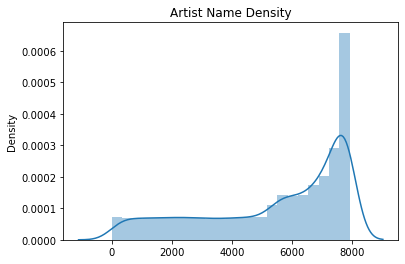

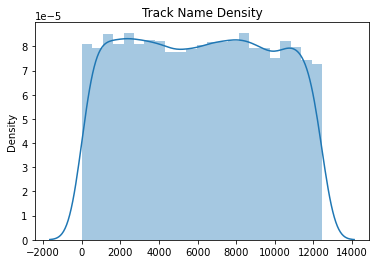

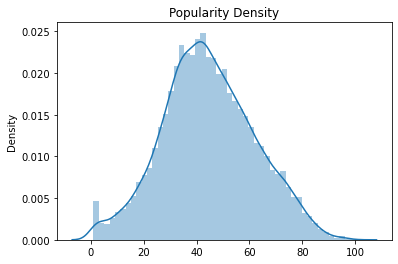

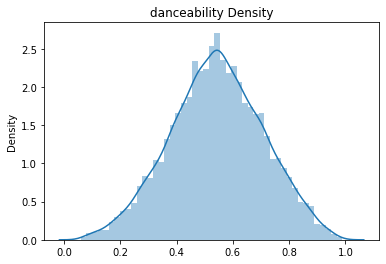

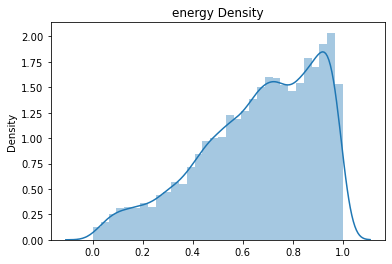

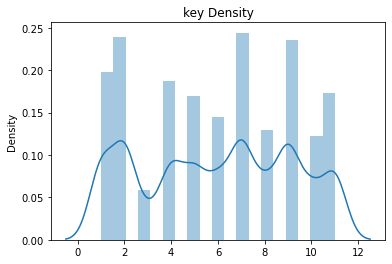

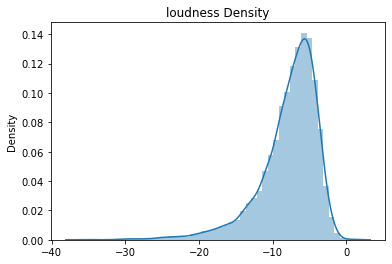

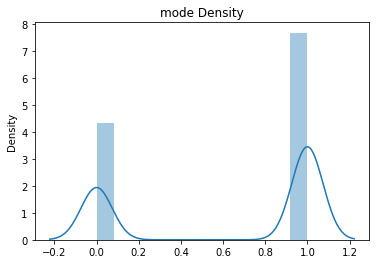

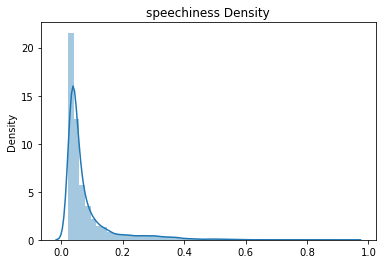

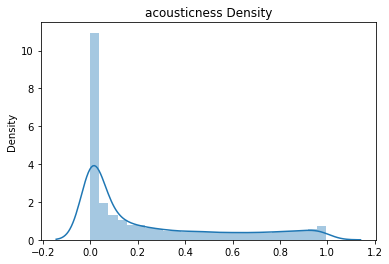

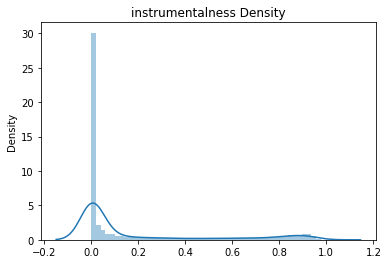

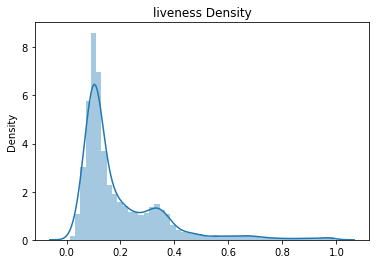

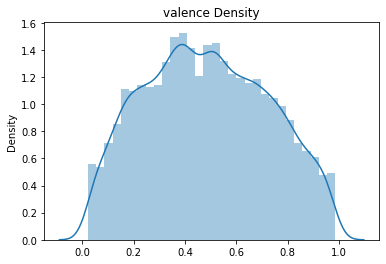

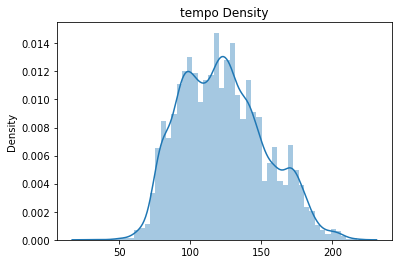

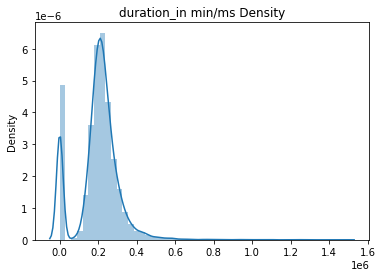

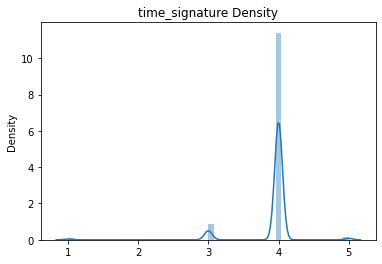

In [51]:
for i in X_train.columns:
    plt.figure()
    sns.distplot(x=X_train[i]).set(title=i+' Density')

In [52]:
def clean_data(df):
    df['Popularity'].fillna(float(X_train['Popularity'].min()), inplace=True)
    df['key'].fillna(int(X_train['key'].min()), inplace=True)
    df['instrumentalness'].fillna(float(X_train['instrumentalness'].mean()), inplace=True)
    return df

In [53]:
X_train = clean_data(X_train)
X_test = clean_data(X_test)

In [54]:
print(X_train.isnull().sum().sum())

0


In [55]:
print(X_test.isnull().sum().sum())

0


C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

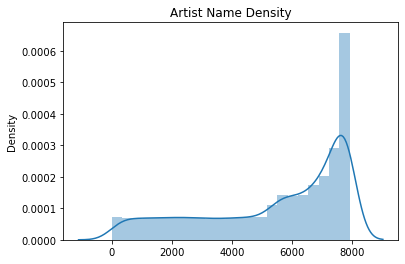

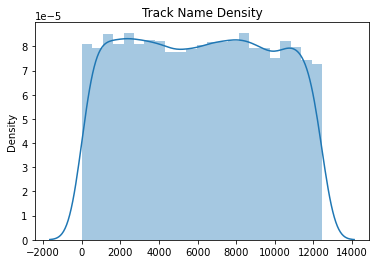

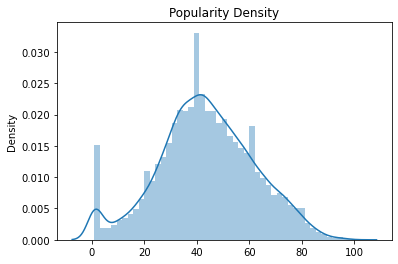

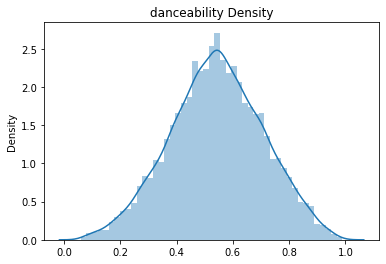

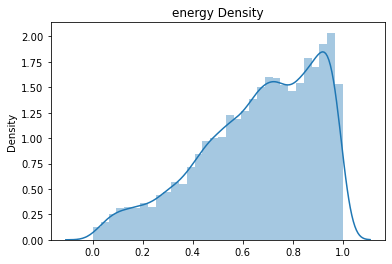

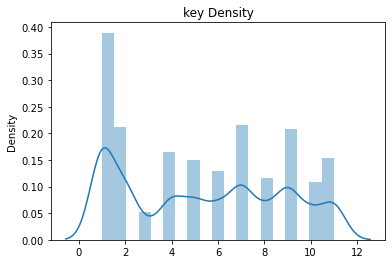

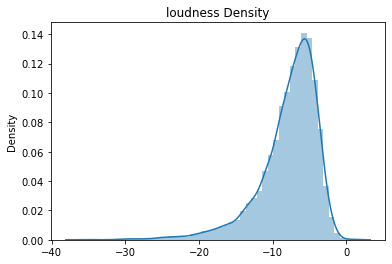

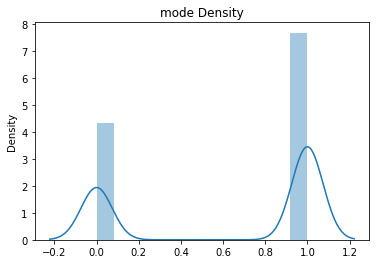

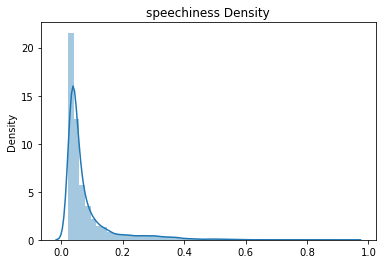

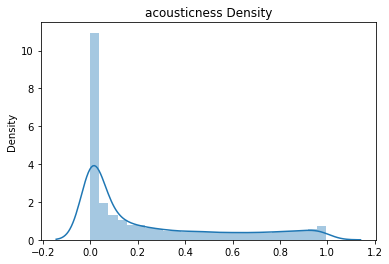

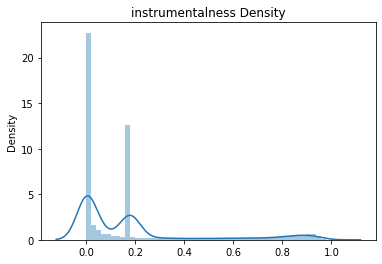

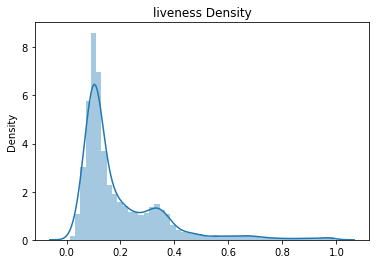

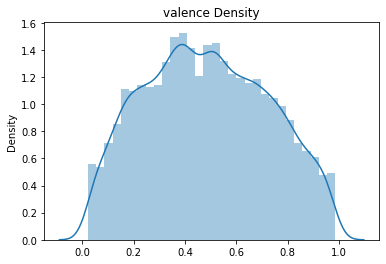

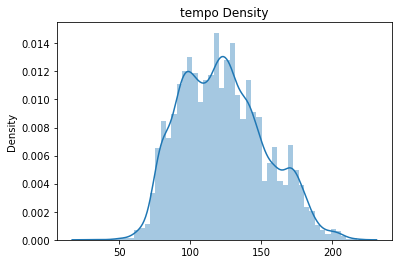

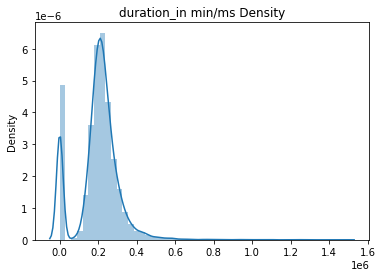

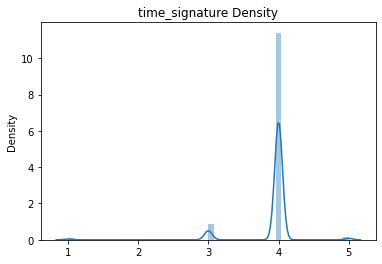

In [56]:
for i in X_train.columns:
    plt.figure()
    sns.distplot(x=X_train[i]).set(title=i+' Density')

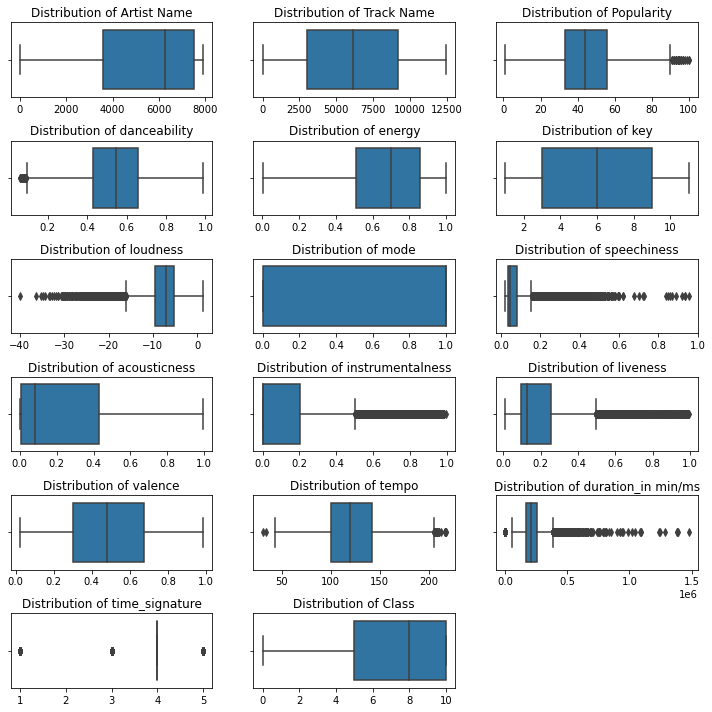

In [57]:
df_cont = df.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plot

In [58]:
def outliers(df):
    df['Popularity'] = np.where(df['Popularity'] >= 90.5,90.5, df['Popularity'])

    df['danceability'] = np.where(df['danceability'] <0.092, 0.092, df['danceability'])

    df['loudness'] = np.where(df['loudness'] <-16.1, -16.1, df['loudness'])

    df['speechiness'] = np.where(df['speechiness'] >0.15, 0.15, df['speechiness'])

    df['instrumentalness'] = np.where(df['instrumentalness'] >0.45, 0.45, df['instrumentalness'])

    df['liveness'] = np.where(df['liveness'] > 0.5, 0.5, df['liveness'])
    
    df['tempo'] = np.where(df['tempo'] > 205.2, 205.2, df['tempo'])

    df['duration_in min/ms'] = np.where(df['duration_in min/ms'] > 380000,380000, df['duration_in min/ms'])

    return df

In [59]:
X_train = outliers(X_train)

In [60]:
X_test = outliers(X_test)

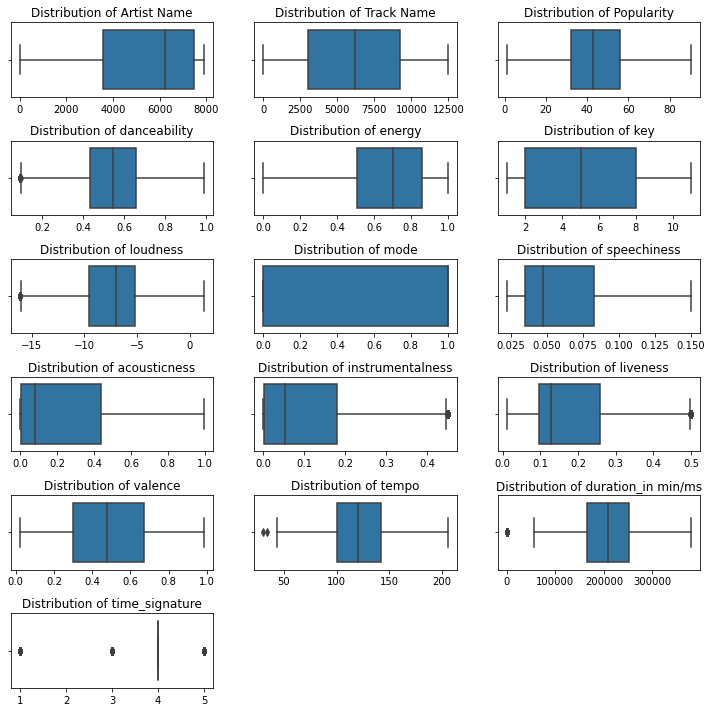

In [61]:
df_cont = X_train.select_dtypes([int,float]) # store all integer or float columns in df_cont variable

fig = plt.figure(figsize=(10, 10)) # sets the size of the 4 plot with width as 10 and height as 10
for i,columns in enumerate(df_cont.columns, 1): 
  ax = plt.subplot(6,3,i) # creates 3 subplots in one single row
  sns.boxplot(data = df_cont, x=df_cont[columns]) # creates box plots for each feature in df_cont dataset
  ax.set_xlabel(None) # removes the labels on x-axis
  ax.set_title(f'Distribution of {columns}') # adds a title to each subplot
  plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show() # displays the plot

In [62]:
X_train.isna().sum().sum()

0

In [63]:
X_test.isna().sum().sum()

0

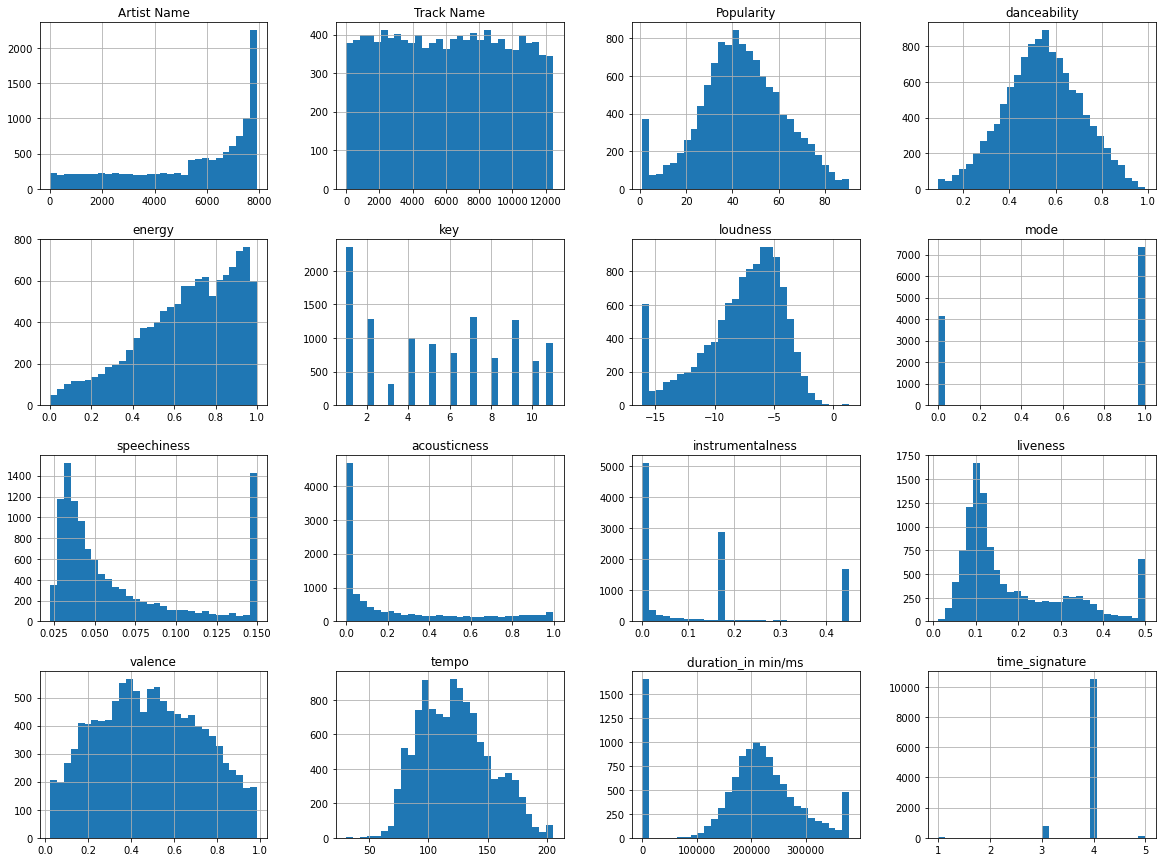

In [64]:
X_train.hist(bins=30, figsize=(20,15))
plt.show()

## Scale features
Scaling data means to make all values in all variables within the same range. MinMaxScaler() (i.e., to make all values between 0 and 1) is the most widely used scaling technique. However, StandardScaler() handles much better datasets with outliers. It makes all values centered around 0 with standard deviation of 1. The steps are executed below.

In [65]:
scaler = StandardScaler()

In [66]:
X_train_scaled = scaler.fit_transform(X_train)

In [67]:
X_train_scaled =  pd.DataFrame(X_train_scaled,columns=X_train.columns,index=X_train.index)

In [68]:
X_train_scaled

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature
6913,0.975522,-0.067864,1.659142,0.377308,-0.378477,-1.000750,-0.822142,0.749469,-0.674888,0.999700,-0.123851,-0.934767,0.239691,0.222220,1.570056,0.214089
13624,-0.082016,0.131368,0.950493,0.734571,0.576688,0.474838,0.747554,-1.334279,-0.697042,-0.494604,-0.837396,-0.642908,-0.565629,-0.944499,0.006475,0.214089
13587,-0.169796,1.091991,-0.139737,-2.729067,-2.259091,-1.295868,-2.435029,0.749469,-0.598578,2.263666,2.006191,-0.733017,-1.870415,-1.419611,-1.997340,-8.087077
8140,0.622731,-0.136420,-0.357782,0.225925,0.763476,-0.410515,0.615949,-1.334279,0.710993,-0.783295,-0.130172,0.290082,0.752927,0.512900,0.363088,0.214089
11691,0.993078,1.209516,-0.139737,-1.263682,1.247426,-1.295868,1.597480,0.749469,0.211288,-0.793467,0.294303,0.210339,-0.281889,-1.111086,-0.079760,0.214089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-1.165053,-0.248068,-1.938616,0.383363,-0.709601,-0.115397,-0.933455,0.749469,0.484526,1.750380,0.294303,-0.626960,0.936523,-1.070625,1.243784,0.214089
13418,0.968834,0.609021,0.187332,-0.300887,0.996960,1.065074,1.269336,0.749469,-0.687196,-0.792890,-0.837390,-0.100657,0.210483,0.107268,-0.056559,0.214089
5390,0.211837,0.705839,0.895982,0.486303,0.946018,-1.295868,1.349633,0.749469,-0.608424,-0.714996,0.294303,0.489439,0.932351,-1.045061,0.329539,0.214089
860,0.271193,1.395037,0.677936,1.582315,0.449332,-1.295868,0.586961,-1.334279,2.089489,-0.696710,0.294303,0.800436,1.629182,-1.484519,-0.325756,0.214089


In [69]:
X_test_scaled= scaler.transform(X_test)

In [70]:
X_test_scaled =  pd.DataFrame(X_test_scaled,columns=X_test.columns,index=X_test.index)

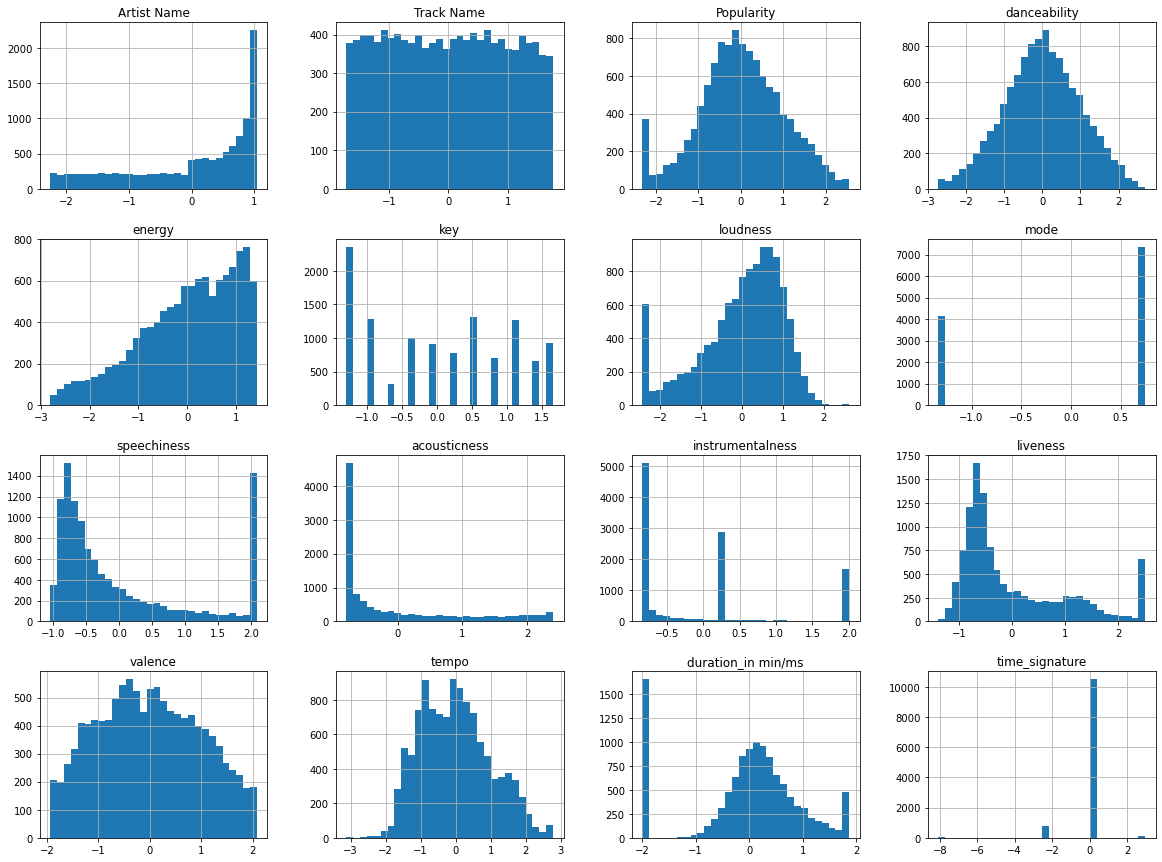

In [71]:
X_train_scaled.hist(bins=30, figsize=(20,15))
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

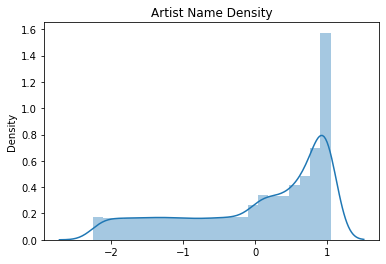

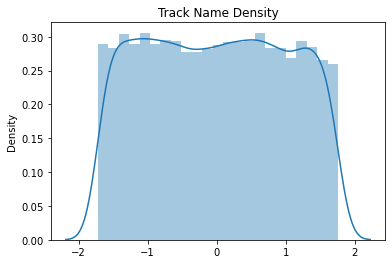

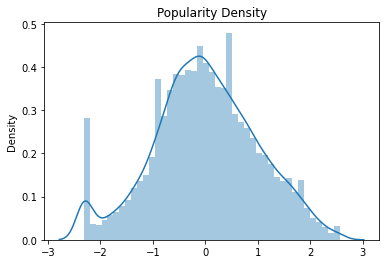

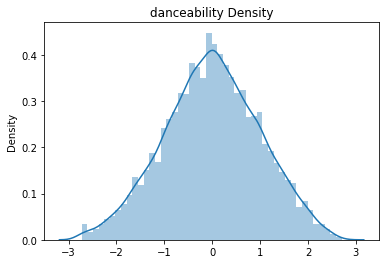

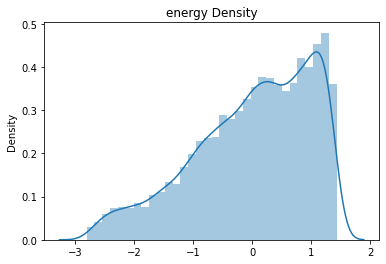

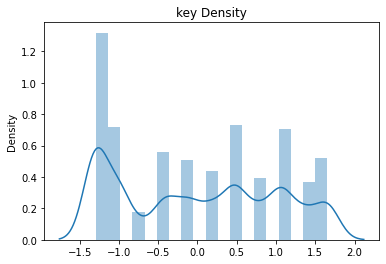

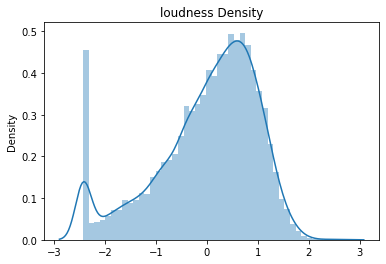

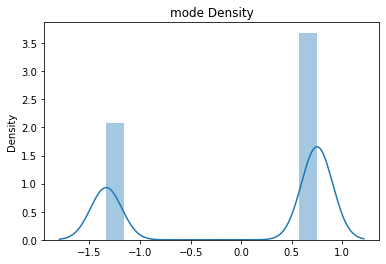

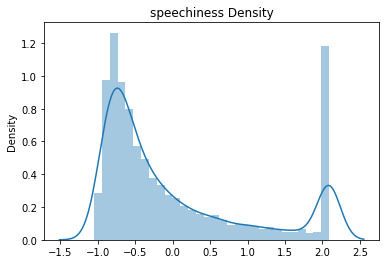

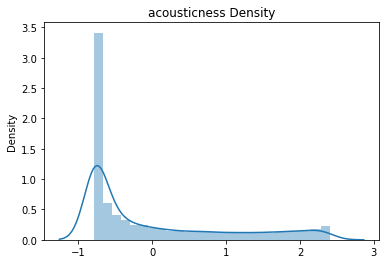

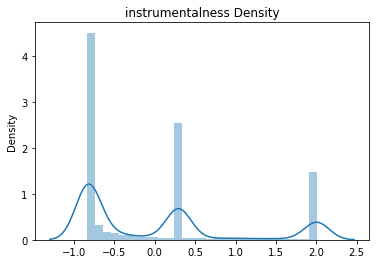

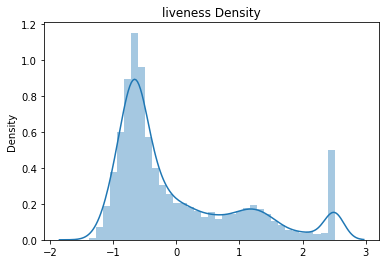

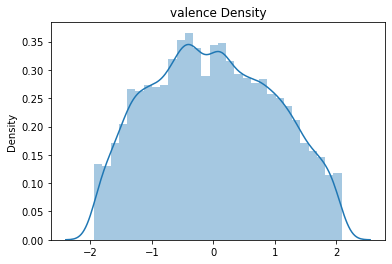

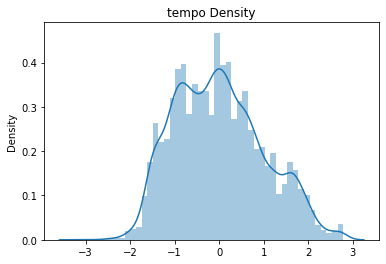

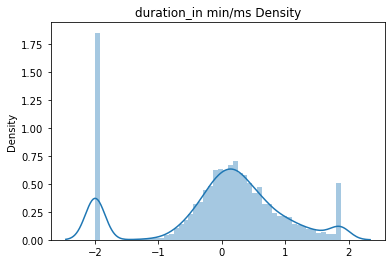

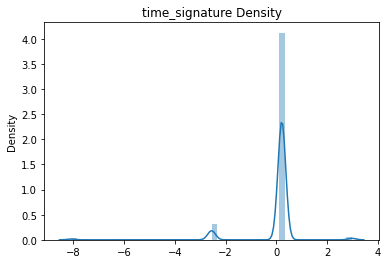

In [72]:
for i in X_train_scaled.columns:
    plt.figure()
    sns.distplot(x=X_train_scaled[i]).set(title=i+' Density')

In [73]:
only_training_data = X_train_scaled.join(y_train)

In [74]:
only_training_data

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
6913,0.975522,-0.067864,1.659142,0.377308,-0.378477,-1.000750,-0.822142,0.749469,-0.674888,0.999700,-0.123851,-0.934767,0.239691,0.222220,1.570056,0.214089,10
13624,-0.082016,0.131368,0.950493,0.734571,0.576688,0.474838,0.747554,-1.334279,-0.697042,-0.494604,-0.837396,-0.642908,-0.565629,-0.944499,0.006475,0.214089,9
13587,-0.169796,1.091991,-0.139737,-2.729067,-2.259091,-1.295868,-2.435029,0.749469,-0.598578,2.263666,2.006191,-0.733017,-1.870415,-1.419611,-1.997340,-8.087077,7
8140,0.622731,-0.136420,-0.357782,0.225925,0.763476,-0.410515,0.615949,-1.334279,0.710993,-0.783295,-0.130172,0.290082,0.752927,0.512900,0.363088,0.214089,2
11691,0.993078,1.209516,-0.139737,-1.263682,1.247426,-1.295868,1.597480,0.749469,0.211288,-0.793467,0.294303,0.210339,-0.281889,-1.111086,-0.079760,0.214089,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,-1.165053,-0.248068,-1.938616,0.383363,-0.709601,-0.115397,-0.933455,0.749469,0.484526,1.750380,0.294303,-0.626960,0.936523,-1.070625,1.243784,0.214089,5
13418,0.968834,0.609021,0.187332,-0.300887,0.996960,1.065074,1.269336,0.749469,-0.687196,-0.792890,-0.837390,-0.100657,0.210483,0.107268,-0.056559,0.214089,1
5390,0.211837,0.705839,0.895982,0.486303,0.946018,-1.295868,1.349633,0.749469,-0.608424,-0.714996,0.294303,0.489439,0.932351,-1.045061,0.329539,0.214089,10
860,0.271193,1.395037,0.677936,1.582315,0.449332,-1.295868,0.586961,-1.334279,2.089489,-0.696710,0.294303,0.800436,1.629182,-1.484519,-0.325756,0.214089,5


In [75]:
#How each feature affects the price of diamonds
corr_matrix = only_training_data.corr()
corr_matrix['Class'].abs().sort_values(ascending=False)

Class                 1.000000
acousticness          0.238167
duration_in min/ms    0.218698
energy                0.216694
loudness              0.196971
Popularity            0.163035
Artist Name           0.126436
danceability          0.100690
valence               0.083482
Track Name            0.072445
time_signature        0.048907
liveness              0.039374
mode                  0.038347
tempo                 0.031526
instrumentalness      0.025239
speechiness           0.018277
key                   0.002487
Name: Class, dtype: float64

# Feature Selection

In [76]:
only_training_data = X_train_scaled.join(y_train)

In [77]:
#How each feature affects the price of diamonds
corr_matrix = only_training_data.corr()
corr_matrix['Class'].abs().sort_values(ascending=False)

Class                 1.000000
acousticness          0.238167
duration_in min/ms    0.218698
energy                0.216694
loudness              0.196971
Popularity            0.163035
Artist Name           0.126436
danceability          0.100690
valence               0.083482
Track Name            0.072445
time_signature        0.048907
liveness              0.039374
mode                  0.038347
tempo                 0.031526
instrumentalness      0.025239
speechiness           0.018277
key                   0.002487
Name: Class, dtype: float64

<AxesSubplot:>

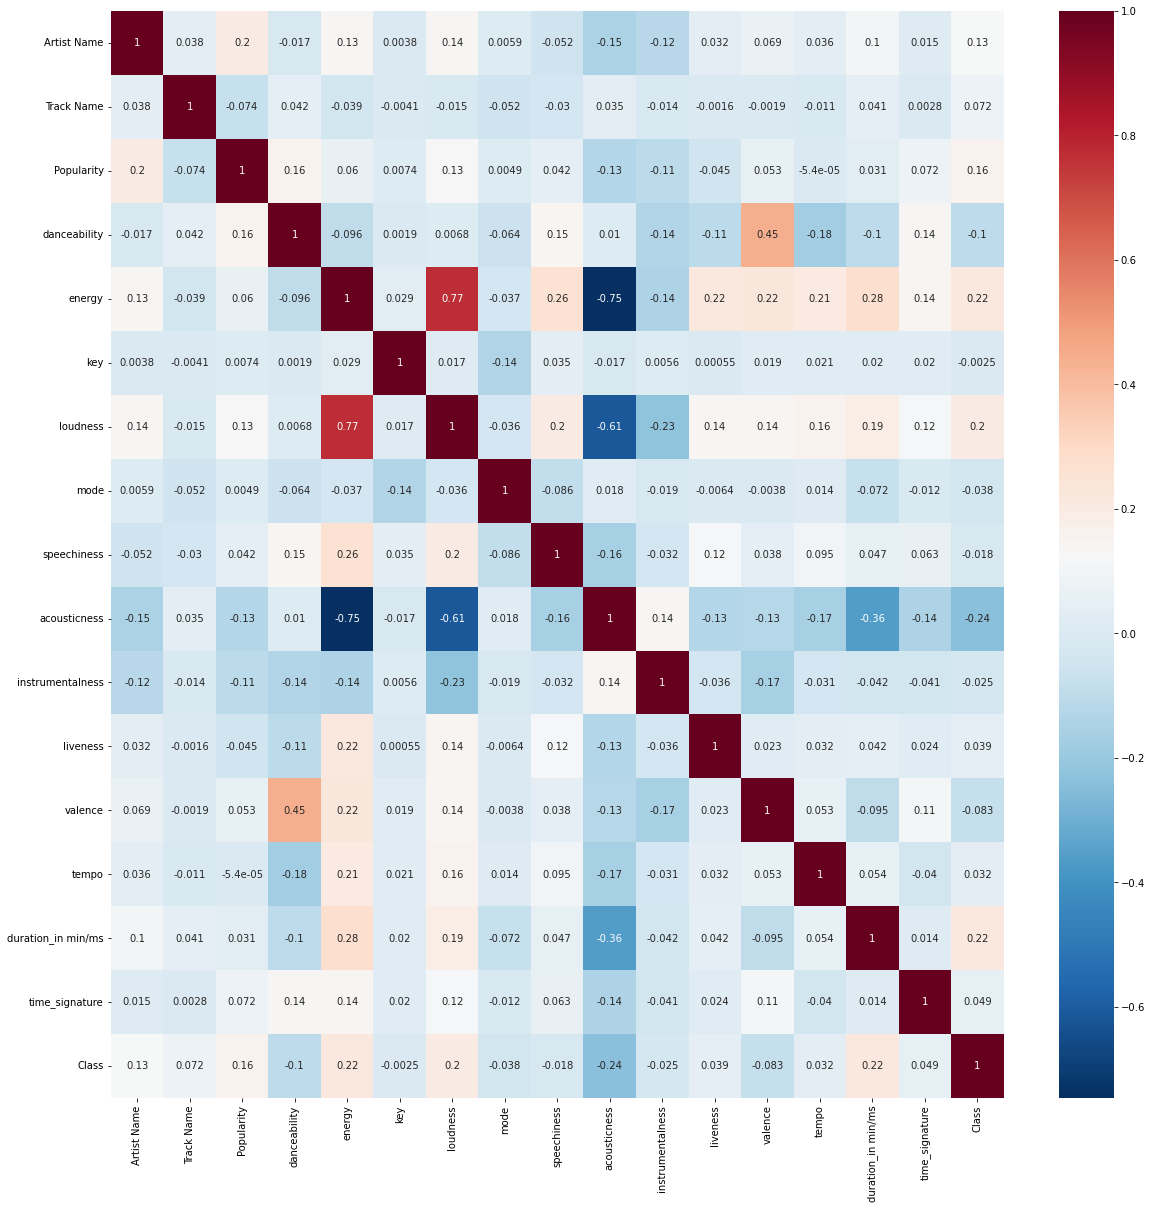

In [78]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=True)

In [79]:
X_train_scaled.drop(columns=['key'], axis=1, inplace=True)

In [80]:
X_test_scaled.drop(columns=['key'], axis=1, inplace=True)

# Modelling Algos

In [83]:
model = make_pipeline(PolynomialFeatures(), LogisticRegression(solver='liblinear',max_iter= 500))
y_pred = model.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [84]:
model.score(X_train_scaled,y_train)

0.5606113233761723

In [85]:
model.score(X_test_scaled,y_test)

0.5357638888888889

In [86]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.54
Precision: 0.52
Recall: 0.54
F1: 0.51


In [87]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 80   0   0   5   6   0   0   8   0   4   1]
 [  0   3   9   0   0  14  36   1  12  24 105]
 [  0   1  93   0   0   5  25   0   7  22  82]
 [  9   0   0  51   1   0   0   4   0   3   0]
 [ 10   0   0   3  41   0   0   1   0   8   5]
 [  0   0   3   0   0 160  14   0   0  40  19]
 [  0   6  16   0   0  33 110   0  22  33 183]
 [  4   0   0   2   1   0   0  80   0   0   0]
 [  0   0   0   0   0   2   8   0 157   3 122]
 [  3   2  16   2   5  43  27   1   3 222  82]
 [  2   2  30   1   4  22  45   0  68  57 546]]
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       104
           1       0.21      0.01      0.03       204
           2       0.56      0.40      0.46       235
           3       0.80      0.75      0.77        68
           4       0.71      0.60      0.65        68
           5       0.57      0.68      0.62       236
           6       0.42      0.27      0.33       403
         

In [88]:
knn = KNeighborsClassifier(n_neighbors=45).fit(X_train_scaled,y_train)
y_predictknn = knn.predict(X_test_scaled)
knn.score(X_train_scaled,y_train)

0.525095519277527

In [89]:
knn.score(X_test_scaled,y_test)

0.5013888888888889

In [90]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predictknn)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predictknn,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predictknn,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predictknn,average='weighted')))

Accuracy: 0.50
Precision: 0.50
Recall: 0.50
F1: 0.47


In [91]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_predictknn))

print("Classification Report")
print(classification_report(y_test, y_predictknn))

Confusion Matrix:
[[ 86   0   0   4   4   0   0   7   0   2   1]
 [  0   2   5   0   0  13  35   3  12  15 119]
 [  0   1  63   0   0   7  28   1   8  22 105]
 [ 17   0   1  37   2   1   0   5   0   3   2]
 [ 13   0   0   2  39   0   0   0   0   7   7]
 [  0   1   2   1   0 155   9   0   1  37  30]
 [  0   0  10   0   0  38  92   2  25  25 211]
 [  4   0   0   0   0   0   0  82   0   1   0]
 [  0   0   0   0   0   4   8   0 128   3 149]
 [  5   0   9   2   3  48  35   2   0 181 121]
 [  3   1  17   0   5  17  43   0  69  43 579]]
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.83      0.74       104
           1       0.40      0.01      0.02       204
           2       0.59      0.27      0.37       235
           3       0.80      0.54      0.65        68
           4       0.74      0.57      0.64        68
           5       0.55      0.66      0.60       236
           6       0.37      0.23      0.28       403
         

In [92]:
clf_all = DecisionTreeClassifier(max_depth=10 ,random_state=42)
clf_all.fit(X_train_scaled,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [93]:
clf_all.score(X_train_scaled,y_train)

0.6110628690517541

In [94]:
clf_all.score(X_test_scaled,y_test)

0.49270833333333336

In [95]:
print(clf_all.feature_importances_)

[0.11439818 0.04180156 0.0992226  0.04341505 0.08915549 0.03239833
 0.00326691 0.10018076 0.12112706 0.1109498  0.02079533 0.05705555
 0.01801521 0.14731685 0.00090133]


In [96]:
y_pred = clf_all.fit(X_train_scaled, y_train).predict(X_test_scaled)

In [97]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.49
Precision: 0.48
Recall: 0.49
F1: 0.48


In [98]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 74   0   0  10  12   0   0   6   0   1   1]
 [  0   6  16   0   0   9  63   0  12  12  86]
 [  0   1 101   0   0   3  57   0   2   4  67]
 [ 12   0   0  40   8   0   0   4   0   3   1]
 [ 11   0   0   3  47   0   0   1   0   1   5]
 [  0   4   8   0   0 144  24   0   0  34  22]
 [  0  12  35   0   0  12 131   0   9  33 171]
 [  6   0   0   0   1   0   0  80   0   0   0]
 [  0   4   4   0   0   3  20   0 121   2 138]
 [  5   1  27   3   4  34  63   1   0 189  79]
 [  6  12  48   3   6   8  89   0  62  57 486]]
Classification Report
              precision    recall  f1-score   support

           0       0.65      0.71      0.68       104
           1       0.15      0.03      0.05       204
           2       0.42      0.43      0.43       235
           3       0.68      0.59      0.63        68
           4       0.60      0.69      0.64        68
           5       0.68      0.61      0.64       236
           6       0.29      0.33      0.31       403
         

In [99]:
poly_kernel_svm_clf = make_pipeline(PolynomialFeatures(), SVC(kernel="poly", degree=2, coef0=1, C=0.5, probability=True))
poly_kernel_svm_clf.fit(X_train_scaled,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('svc',
                 SVC(C=0.5, coef0=1, degree=2, kernel='poly',
                     probability=True))])

In [100]:
y_pred = poly_kernel_svm_clf.predict(X_test_scaled)

In [101]:
poly_kernel_svm_clf.score(X_train_scaled,y_train)

0.5948245918721778

In [102]:
poly_kernel_svm_clf.score(X_test_scaled,y_test)

0.5295138888888888

In [103]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.53
Precision: 0.52
Recall: 0.53
F1: 0.50


In [104]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 87   0   0   5   6   0   0   3   0   3   0]
 [  0   1   3   0   0   9  37   0   4  17 133]
 [  0   0  61   0   0   4  24   0   3  17 126]
 [ 10   0   0  48   1   0   0   4   0   4   1]
 [ 15   0   0   1  44   0   0   0   0   7   1]
 [  0   0   0   0   0 160   9   0   0  44  23]
 [  0   3   6   0   0  27 101   0  13  25 228]
 [  4   0   0   3   1   0   0  79   0   0   0]
 [  0   1   0   0   0   3   7   0 124   3 154]
 [  5   0  10   1   3  39  29   2   0 214 103]
 [  2   3  15   1   5  20  36   0  47  42 606]]
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.84      0.77       104
           1       0.12      0.00      0.01       204
           2       0.64      0.26      0.37       235
           3       0.81      0.71      0.76        68
           4       0.73      0.65      0.69        68
           5       0.61      0.68      0.64       236
           6       0.42      0.25      0.31       403
         

In [105]:
linear = SVC(kernel='linear', C=10, decision_function_shape='ovo').fit(X_train_scaled, y_train)
rbf = SVC(kernel='rbf', gamma=0.05, C=0.5, decision_function_shape='ovo').fit(X_train_scaled, y_train)
poly =SVC(kernel='poly', degree=2, coef0=1, C=0.05, decision_function_shape='ovo').fit(X_train_scaled, y_train)

In [106]:
linear_pred = linear.predict(X_test_scaled)
poly_pred = poly.predict(X_test_scaled)
rbf_pred = rbf.predict(X_test_scaled)

In [107]:
accuracy_lin = linear.score(X_train_scaled, y_train)
accuracy_poly = poly.score(X_train_scaled, y_train)
accuracy_rbf = rbf.score(X_train_scaled, y_train)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)

Accuracy Linear Kernel: 0.5044286210489753
Accuracy Polynomial Kernel: 0.5185828412643279
Accuracy Radial Basis Kernel: 0.5541854810698159


In [108]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test_scaled, y_test)
accuracy_poly = poly.score(X_test_scaled, y_test)
accuracy_rbf = rbf.score(X_test_scaled, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)

Accuracy Linear Kernel: 0.4947916666666667
Accuracy Polynomial Kernel: 0.5065972222222223
Accuracy Radial Basis Kernel: 0.5298611111111111


In [109]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, linear_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, linear_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, linear_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, linear_pred,average='weighted')))

Accuracy: 0.49
Precision: 0.47
Recall: 0.49
F1: 0.46


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, poly_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, poly_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, poly_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, poly_pred,average='weighted')))

NameError: name 'accuracy_score' is not defined

In [111]:
#rbf_pred
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rbf_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, rbf_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, rbf_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, rbf_pred,average='weighted')))

Accuracy: 0.53
Precision: 0.51
Recall: 0.53
F1: 0.50


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, linear_pred))

print("Classification Report")
print(classification_report(y_test, linear_pred))

Confusion Matrix:
[[ 72   0   0   5   9   0   0   8   0  10   0]
 [  0   0   5   0   0  15  25   0   8  20 131]
 [  0   0  66   0   0   7  19   0   4  23 116]
 [ 17   0   0  39   1   0   0   6   0   5   0]
 [ 12   0   0   2  40   0   0   0   0   9   5]
 [  0   0   1   0   0 162  10   0   1  37  25]
 [  0   0  15   0   0  43  72   0  17  46 210]
 [  6   0   0   1   0   0   0  80   0   0   0]
 [  0   0   1   0   0   5   5   0 138   2 141]
 [ 11   0  11   2   5  48  21   1   0 186 121]
 [  1   0  20   3  11  25  36   0  59  52 570]]
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.69      0.65       104
           1       0.00      0.00      0.00       204
           2       0.55      0.28      0.37       235
           3       0.75      0.57      0.65        68
           4       0.61      0.59      0.60        68
           5       0.53      0.69      0.60       236
           6       0.38      0.18      0.24       403
         

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rbf_pred))

print("Classification Report")
print(classification_report(y_test, rbf_pred))

Confusion Matrix:
[[ 91   0   0   3   4   0   0   2   0   4   0]
 [  0   0   7   0   0   9  35   1   4  21 127]
 [  0   0  67   0   0   5  20   0   5  18 120]
 [ 10   0   0  48   1   0   0   4   0   3   2]
 [ 12   0   0   2  43   0   0   0   0   8   3]
 [  0   0   0   1   0 164   8   0   0  42  21]
 [  0   0  12   0   0  36  89   0  13  31 222]
 [  6   0   0   1   0   0   0  80   0   0   0]
 [  0   0   0   0   0   4   4   0 131   2 151]
 [  3   0  11   2   4  45  27   1   0 210 103]
 [  3   0  17   1   9  19  29   0  48  48 603]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.88      0.79       104
           1       0.00      0.00      0.00       204
           2       0.59      0.29      0.38       235
           3       0.83      0.71      0.76        68
           4       0.70      0.63      0.67        68
           5       0.58      0.69      0.63       236
           6       0.42      0.22      0.29       403
         

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [114]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, rbf_pred))

print("Classification Report")
print(classification_report(y_test, rbf_pred))

Confusion Matrix:
[[ 91   0   0   3   4   0   0   2   0   4   0]
 [  0   0   7   0   0   9  35   1   4  21 127]
 [  0   0  67   0   0   5  20   0   5  18 120]
 [ 10   0   0  48   1   0   0   4   0   3   2]
 [ 12   0   0   2  43   0   0   0   0   8   3]
 [  0   0   0   1   0 164   8   0   0  42  21]
 [  0   0  12   0   0  36  89   0  13  31 222]
 [  6   0   0   1   0   0   0  80   0   0   0]
 [  0   0   0   0   0   4   4   0 131   2 151]
 [  3   0  11   2   4  45  27   1   0 210 103]
 [  3   0  17   1   9  19  29   0  48  48 603]]
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.88      0.79       104
           1       0.00      0.00      0.00       204
           2       0.59      0.29      0.38       235
           3       0.83      0.71      0.76        68
           4       0.70      0.63      0.67        68
           5       0.58      0.69      0.63       236
           6       0.42      0.22      0.29       403
         

C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
param_grid = {
    'n_estimators': [120],
    'max_depth': [7],
    'max_features': ['log2'],
    'min_samples_leaf': [3],
    'min_samples_split': [5],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [116]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7], 'max_features': ['log2'],
                         'min_samples_leaf': [3], 'min_samples_split': [5],
                         'n_estimators': [120]},
             verbose=2)

In [117]:
print('Grid best parameter (max. accuracy): ', grid_search.best_params_)
print('Grid best score (accuracy): ', grid_search.best_score_)

Grid best parameter (max. accuracy):  {'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 120}
Grid best score (accuracy):  0.5164991617214262


In [118]:
finalRandom1 = grid_search.best_estimator_

In [119]:
finalRandom1.score(X_train_scaled,y_train)

0.5561827023271969

In [120]:
finalRandom1.score(X_test_scaled,y_test)

0.5118055555555555

In [121]:
y_predRandom1 = finalRandom1.predict(X_test_scaled)

In [122]:
#randomforest
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_predRandom1)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_predRandom1,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_predRandom1,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_predRandom1,average='weighted')))

Accuracy: 0.51
Precision: 0.51
Recall: 0.51
F1: 0.46


C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [123]:
cm1 = confusion_matrix(y_test, y_predRandom1)

In [124]:
cm1

array([[ 90,   0,   0,   4,   4,   0,   0,   3,   0,   2,   1],
       [  0,   0,   1,   0,   0,   9,  32,   0,   5,  10, 147],
       [  0,   0,   6,   0,   0,   2,  25,   0,   3,  15, 184],
       [ 18,   0,   0,  45,   1,   0,   0,   3,   0,   1,   0],
       [ 17,   0,   0,   1,  40,   0,   0,   0,   0,   6,   4],
       [  0,   0,   0,   0,   0, 151,   7,   0,   0,  44,  34],
       [  0,   0,   2,   0,   0,  28,  85,   0,  12,  23, 253],
       [  6,   0,   0,   0,   0,   0,   0,  81,   0,   0,   0],
       [  0,   0,   0,   0,   0,   3,   6,   0, 132,   0, 151],
       [  9,   0,   0,   2,   1,  35,  15,   0,   0, 199, 145],
       [  5,   0,   2,   0,   7,  18,  26,   0,  42,  32, 645]],
      dtype=int64)

In [125]:
print(classification_report(y_test, y_predRandom1))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72       104
           1       0.00      0.00      0.00       204
           2       0.55      0.03      0.05       235
           3       0.87      0.66      0.75        68
           4       0.75      0.59      0.66        68
           5       0.61      0.64      0.63       236
           6       0.43      0.21      0.28       403
           7       0.93      0.93      0.93        87
           8       0.68      0.45      0.54       292
           9       0.60      0.49      0.54       406
          10       0.41      0.83      0.55       777

    accuracy                           0.51      2880
   macro avg       0.59      0.52      0.51      2880
weighted avg       0.51      0.51      0.46      2880



C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [126]:
# fit model no training data
model = XGBClassifier(max_depth=2)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [127]:
# make predictions for test data
y_pred = model.predict(X_test_scaled)
predictions = [round(value) for value in y_pred]

In [128]:
model.score(X_train_scaled,y_train)

0.6285168461271274

In [129]:
model.score(X_test_scaled,y_test)

0.5680555555555555

In [130]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.57
Precision: 0.57
Recall: 0.57
F1: 0.55


In [131]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       104
           1       0.50      0.00      0.01       204
           2       0.59      0.45      0.51       235
           3       0.80      0.75      0.77        68
           4       0.70      0.79      0.74        68
           5       0.66      0.70      0.68       236
           6       0.43      0.40      0.41       403
           7       0.92      0.92      0.92        87
           8       0.61      0.58      0.60       292
           9       0.61      0.57      0.59       406
          10       0.49      0.69      0.57       777

    accuracy                           0.57      2880
   macro avg       0.64      0.61      0.60      2880
weighted avg       0.57      0.57      0.55      2880



In [135]:
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)

In [136]:
estimators = []
model1 = LogisticRegression(); estimators.append (('logistic', model1))
model2 = DecisionTreeClassifier(); estimators.append (('cart', model2))
model3 = SVC(); estimators.append (('svm', model3))

In [137]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)
print(); print(results.mean())

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 


0.5199740262090936


In [138]:
ensemble.fit(X_train_scaled, y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [139]:
y_pred = ensemble.predict(X_test_scaled)

In [140]:
ensemble.score(X_train_scaled,y_train)

0.6441472733588052

In [141]:
ensemble.score(X_test_scaled,y_test)

0.5194444444444445

In [145]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred,average='weighted')))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred,average='weighted')))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred,average='weighted')))

Accuracy: 0.52
Precision: 0.50
Recall: 0.52
F1: 0.50


# learning_curve for XGB Classifier

In [147]:
from sklearn.model_selection import learning_curve
N, train_lc, val_lc = learning_curve(model,
                                     X_train_scaled, y_train,scoring='f1_macro',cv=5,
                                     train_sizes=np.linspace(0.1, 1, 30))

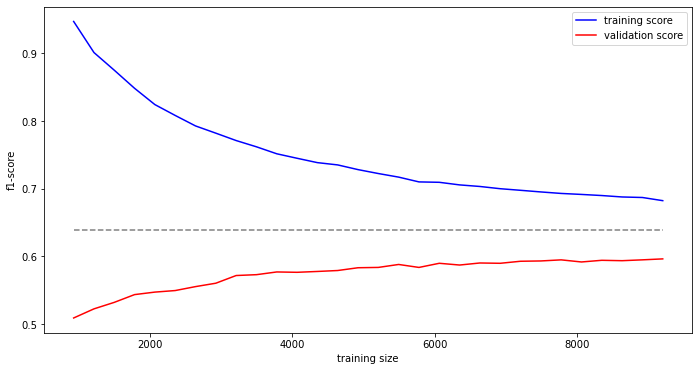

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
fig.subplots_adjust(left=0.1, right=1, wspace=1)

ax.plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax.plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax.hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
             color='gray', linestyle='dashed')


ax.set_xlabel('training size')
ax.set_ylabel('f1-score')
ax.legend(loc='best')

# Validation curve

In [149]:
param_range = np.arange(1, 100, 10)

train_score, val_score = validation_curve(model,
                                  X_train, y_train, param_name="n_estimators", param_range=param_range,
                                  cv=5, scoring="f1_macro")

In [150]:
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(val_score, axis = 1)
std_test_score = np.std(val_score, axis = 1)

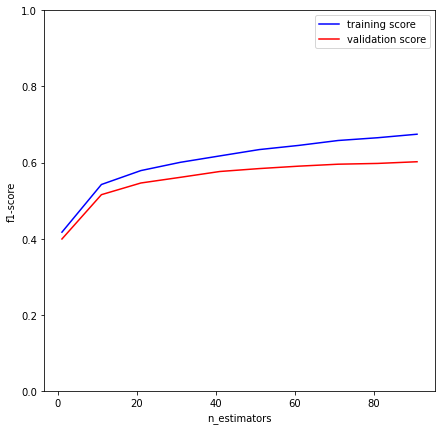

In [151]:
plt.subplots(1, figsize=(7,7))
plt.plot(param_range, np.median(train_score, 1), color='blue', label='training score')
plt.plot(param_range, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('n_estimators')
plt.ylabel('f1-score');

In [ ]:
test = pd.read_csv(r'C:\Users\USER\Desktop\AI\ML Shai\last project\test (2).csv')

In [ ]:
test['Track Name'] = LabelEncoder().fit_transform(test['Track Name'])

enc = OrdinalEncoder(categories=[test["Artist Name"].value_counts().sort_values(ascending = True).index],dtype=int)
test[['Artist Name']]=enc.fit_transform(test[['Artist Name']])

testi = clean_data(test)
testi = outliers(test)

testi = scaler.fit_transform(testi)
testi =  pd.DataFrame(testi,columns=test.columns,index=test.index)

testi.drop(columns=['key'], axis=1, inplace=True)

testi.drop(columns=['Id'], axis=1, inplace=True)

In [ ]:
y_pred = ensemble.predict(testi)

In [ ]:
my_submission = pd.DataFrame({'Id': test.Id, 'Class': y_pred})

my_submission.to_csv('submission.csv', index=False)
from IPython.display import FileLink
FileLink('submission.csv')